# Traffic Sign Classification with Keras

Comparing performance of convolutional neural networks with and without pooling and dropout. This notebook contains code to run each of the experiments included in my blog post.

In [2]:
import pickle
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils

import pandas as pd
% matplotlib inline

Using TensorFlow backend.


## 1. Load the Data

In [28]:
# Load pickled data

training_file = "traffic-sign-data/train.p"
testing_file = "traffic-sign-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

## 2. Preprocess the data

In [30]:
# Shuffle data
X_train, y_train = shuffle(X_train, y_train, random_state=42)
X_test, y_test = shuffle(X_test, y_test, random_state=42)

In [32]:
# Normalise data
X_train = (X_train - X_train.mean()) / (np.max(X_train) - np.min(X_train))
X_test = (X_test - X_test.mean()) / (np.max(X_test) - np.min(X_test))

In [37]:
# One-hot encode labels
y_train = np_utils.to_categorical(y_train,nb_classes=43)
y_test = np_utils.to_categorical(y_test, nb_classes=43)

In [41]:
# Split some of the training data into a validation dataset.
X_train, X_val, y_train, y_val = train_test_split(\
    X_train, y_train, test_size=0.2, random_state=42)

print("X_train: ", len(X_train))
print("y_train: ", len(y_train))
print("X_val: ", len(X_val))
print("y_val: ", len(y_val))

## 3. Build and run the networks

In [46]:
# Network training parameters
nb_epoch = 100
batch_size = 100

# Convnet parameters
nb_filters = 32
kernel_size = (3, 3)
input_shape = (32, 32, 3)
pool_size = (2, 2)
dropout_conv = 0.2
dropout_fc = 0.5

### 3.1 No pooling or dropout

In [47]:
# No pooling or dropout
model = Sequential()

# Layer 1: Conv layer
model.add(Convolution2D(32, 
                        kernel_size[0], kernel_size[1],
                        border_mode='valid',
                        input_shape=input_shape))
model.add(Activation('relu'))

# Layer 2: Fully connected layer 1
model.add(Flatten())
model.add(Dense(512, input_shape=(32*32*3,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

# Layer 3: Fully connected layer 2
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.2))

# Layer 4: Output layer
# Convert to 43 labels since 43 outputs
model.add(Dense(43))
# Softmax to compute probabilities
output = model.add(Activation('softmax'))


# Compile and train the model.
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    batch_size=batch_size, nb_epoch=nb_epoch,
                    verbose=1, validation_data=(X_val, y_val))

Train on 31367 samples, validate on 7842 samples
Epoch 1/100
31367/31367 [==============================] - 12s - loss: 1.0337 - acc: 0.7152 - val_loss: 0.2467 - val_acc: 0.9359
Epoch 2/100
31367/31367 [==============================] - 10s - loss: 0.2440 - acc: 0.9315 - val_loss: 0.1375 - val_acc: 0.9637
Epoch 3/100
31367/31367 [==============================] - 10s - loss: 0.1384 - acc: 0.9614 - val_loss: 0.1004 - val_acc: 0.9717
Epoch 4/100
31367/31367 [==============================] - 10s - loss: 0.1010 - acc: 0.9708 - val_loss: 0.0961 - val_acc: 0.9726
Epoch 5/100
31367/31367 [==============================] - 10s - loss: 0.0835 - acc: 0.9757 - val_loss: 0.0694 - val_acc: 0.9787
Epoch 6/100
31367/31367 [==============================] - 10s - loss: 0.0628 - acc: 0.9814 - val_loss: 0.0760 - val_acc: 0.9813
Epoch 7/100
31367/31367 [==============================] - 10s - loss: 0.0650 - acc: 0.9812 - val_loss: 0.0739 - val_acc: 0.9813
Epoch 8/100
31367/31367 [=======================

**Validation Accuracy**: 0.9654 after two epochs.
```
Train on 31367 samples, validate on 7842 samples
Epoch 1/2
31367/31367 [==============================] - 145s - loss: 1.0289 - acc: 0.7180 - val_loss: 0.2400 - val_acc: 0.9396
Epoch 2/2
31367/31367 [==============================] - 143s - loss: 0.2480 - acc: 0.9306 - val_loss: 0.1246 - val_acc: 0.9654
```

### 3.2 Pooling but no dropout

In [48]:
# Pooling with no dropout
model = Sequential()

# Layer 1: Conv layer
model.add(Convolution2D(32, 
                        kernel_size[0], kernel_size[1],
                        border_mode='valid',
                        input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))

# Layer 2: Fully connected layer 1
model.add(Flatten())
model.add(Dense(512, input_shape=(32*32*3,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

# Layer 3: Fully connected layer 2
hidden1 = model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.2))

# Layer 4: Output layer
# Convert to 43 labels since 43 outputs
model.add(Dense(43))
# Softmax to compute probabilities
output = model.add(Activation('softmax'))


# Compile and train the model.
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    batch_size=batch_size, nb_epoch=nb_epoch,
                    verbose=1, validation_data=(X_val, y_val))

Train on 31367 samples, validate on 7842 samples
Epoch 1/100
31367/31367 [==============================] - 5s - loss: 1.3430 - acc: 0.6277 - val_loss: 0.3041 - val_acc: 0.9313
Epoch 2/100
31367/31367 [==============================] - 5s - loss: 0.3202 - acc: 0.9086 - val_loss: 0.1640 - val_acc: 0.9552
Epoch 3/100
31367/31367 [==============================] - 5s - loss: 0.1773 - acc: 0.9498 - val_loss: 0.0993 - val_acc: 0.9770
Epoch 4/100
31367/31367 [==============================] - 5s - loss: 0.1238 - acc: 0.9635 - val_loss: 0.0915 - val_acc: 0.9745
Epoch 5/100
31367/31367 [==============================] - 5s - loss: 0.0940 - acc: 0.9731 - val_loss: 0.0765 - val_acc: 0.9813
Epoch 6/100
31367/31367 [==============================] - 5s - loss: 0.0810 - acc: 0.9765 - val_loss: 0.0721 - val_acc: 0.9823
Epoch 7/100
31367/31367 [==============================] - 5s - loss: 0.0619 - acc: 0.9819 - val_loss: 0.0783 - val_acc: 0.9788
Epoch 8/100
31367/31367 [==============================

**Validation Accuracy**: 0.9651

```
Train on 31367 samples, validate on 7842 samples
Epoch 1/2
31367/31367 [==============================] - 42s - loss: 1.3786 - acc: 0.6184 - val_loss: 0.3510 - val_acc: 0.9050
Epoch 2/2
31367/31367 [==============================] - 40s - loss: 0.3183 - acc: 0.9102 - val_loss: 0.1366 - val_acc: 0.9651
```

### 3.3 Pooling and dropout


In [49]:
# Pooling and dropout

model = Sequential()
# Layer 1: Conv layer
model.add(Convolution2D(nb_filters, 
                        kernel_size[0], kernel_size[1],
                        border_mode='valid',
                        input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.5))

# Layer 2: Fully connected layer 1
model.add(Flatten())
model.add(Dense(512, input_shape=(32*32*3,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

# Layer 3: Fully connected layer 2
hidden1 = model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.2))

# Layer 4: Output layer
# Convert to 43 labels since 43 outputs
model.add(Dense(43))
# Softmax to compute probabilities
output = model.add(Activation('softmax'))


# Compile and train the model.
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    batch_size=batch_size, nb_epoch=nb_epoch,
                    verbose=1, validation_data=(X_val, y_val))

Train on 31367 samples, validate on 7842 samples
Epoch 1/100
31367/31367 [==============================] - 5s - loss: 1.4521 - acc: 0.5913 - val_loss: 0.3716 - val_acc: 0.9055
Epoch 2/100
31367/31367 [==============================] - 5s - loss: 0.4295 - acc: 0.8742 - val_loss: 0.1843 - val_acc: 0.9507
Epoch 3/100
31367/31367 [==============================] - 5s - loss: 0.2708 - acc: 0.9198 - val_loss: 0.1144 - val_acc: 0.9740
Epoch 4/100
31367/31367 [==============================] - 5s - loss: 0.2002 - acc: 0.9414 - val_loss: 0.0907 - val_acc: 0.9772
Epoch 5/100
31367/31367 [==============================] - 5s - loss: 0.1627 - acc: 0.9507 - val_loss: 0.0744 - val_acc: 0.9809
Epoch 6/100
31367/31367 [==============================] - 5s - loss: 0.1334 - acc: 0.9602 - val_loss: 0.0612 - val_acc: 0.9858
Epoch 7/100
31367/31367 [==============================] - 5s - loss: 0.1195 - acc: 0.9625 - val_loss: 0.0565 - val_acc: 0.9855
Epoch 8/100
31367/31367 [==============================

**Validation Accuracy**: 0.9570 after two epochs.

```
Train on 31367 samples, validate on 7842 samples
Epoch 1/2
31367/31367 [==============================] - 43s - loss: 1.4900 - acc: 0.5787 - val_loss: 0.3572 - val_acc: 0.9081
Epoch 2/2
31367/31367 [==============================] - 45s - loss: 0.4357 - acc: 0.8719 - val_loss: 0.1841 - val_acc: 0.9570
```

### 3.4 Dropout with no pooling

In [51]:
# Dropout with no pooling
model = Sequential()

# Layer 1: Conv layer
model.add(Convolution2D(nb_filters, 
                        kernel_size[0], kernel_size[1],
                        border_mode='valid',
                        input_shape=input_shape))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Layer 2: Fully connected layer 1
model.add(Flatten())
model.add(Dense(512, input_shape=(32*32*3,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

# Layer 3: Fully connected layer 2
hidden1 = model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.2))

# Layer 4: Output layer
# Convert to 43 labels since 43 outputs
model.add(Dense(43))
# Softmax to compute probabilities
output = model.add(Activation('softmax'))


# Compile and train the model.
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    batch_size=batch_size, nb_epoch=nb_epoch,
                    verbose=1, validation_data=(X_val, y_val))

Train on 31367 samples, validate on 7842 samples
Epoch 1/100
31367/31367 [==============================] - 11s - loss: 1.1519 - acc: 0.6792 - val_loss: 0.2741 - val_acc: 0.9317
Epoch 2/100
31367/31367 [==============================] - 11s - loss: 0.2941 - acc: 0.9167 - val_loss: 0.1422 - val_acc: 0.9602
Epoch 3/100
31367/31367 [==============================] - 11s - loss: 0.1743 - acc: 0.9504 - val_loss: 0.1027 - val_acc: 0.9748
Epoch 4/100
31367/31367 [==============================] - 11s - loss: 0.1280 - acc: 0.9622 - val_loss: 0.0973 - val_acc: 0.9742
Epoch 5/100
31367/31367 [==============================] - 11s - loss: 0.0957 - acc: 0.9718 - val_loss: 0.0714 - val_acc: 0.9825
Epoch 6/100
31367/31367 [==============================] - 11s - loss: 0.0844 - acc: 0.9755 - val_loss: 0.0741 - val_acc: 0.9804
Epoch 7/100
31367/31367 [==============================] - 11s - loss: 0.0780 - acc: 0.9770 - val_loss: 0.0720 - val_acc: 0.9799
Epoch 8/100
31367/31367 [=======================

**Validation Accuracy**: 0.9602 after two epochs.

```
Train on 31367 samples, validate on 7842 samples
Epoch 1/100
31367/31367 [==============================] - 11s - loss: 1.1519 - acc: 0.6792 - val_loss: 0.2741 - val_acc: 0.9317
Epoch 2/100
31367/31367 [==============================] - 11s - loss: 0.2941 - acc: 0.9167 - val_loss: 0.1422 - val_acc: 0.9602
```

## 4. Results and Plots
### 4.1 Results per network

In [3]:
results = pd.read_csv("logs/cnn-pooling-dropout-comparisons.csv")
results.head()

,epoch,loss,acc,val_loss,val_acc,network
0,1,1.0337,0.7152,0.2467,0.9359,no_pool_no_dropout
1,2,0.2440,0.9315,0.1375,0.9637,no_pool_no_dropout
2,3,0.1384,0.9614,0.1004,0.9717,no_pool_no_dropout
3,4,0.1010,0.9708,0.0961,0.9726,no_pool_no_dropout
4,5,0.0835,0.9757,0.0694,0.9787,no_pool_no_dropout


In [4]:
no_pool_no_dropout_data = results[results["network"] == "no_pool_no_dropout"]
pool_no_dropout_data = results[results["network"] == "pool_no_dropout"]
pool_dropout_data = results[results["network"] == "pool_dropout"]
dropout_no_pool_data = results[results["network"] == "dropout_no_pool"]

In [7]:
no_pool_no_dropout_data = no_pool_no_dropout_data.rename(lambda x: x + 1)
pool_no_dropout_data = pool_no_dropout_data.rename(lambda x: x - 99)
pool_dropout_data = pool_dropout_data.rename(lambda x: x - 199)
dropout_no_pool_data = dropout_no_pool_data.rename(lambda x: x - 299)

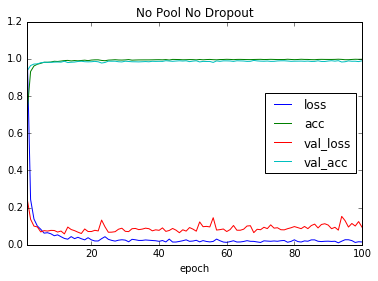

In [11]:
no_pool_no_dropout_data.plot(x='epoch', title='No Pool No Dropout')

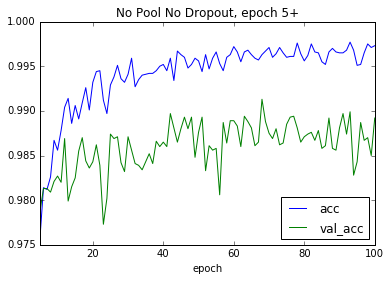

In [28]:
no_pool_no_dropout_data.loc[5:].plot(x='epoch', y=['acc', 'val_acc'], title='No Pool No Dropout, epoch 5+')

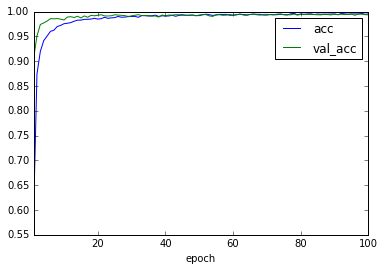

In [34]:
pool_dropout_data.plot(x='epoch', y=['acc', 'val_acc'])

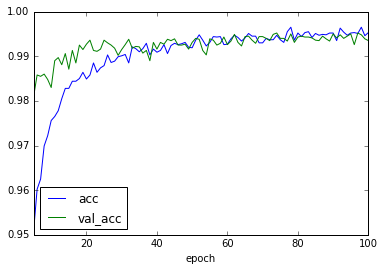

In [35]:
pool_dropout_data.loc[5:].plot(x='epoch', y=['acc', 'val_acc'])

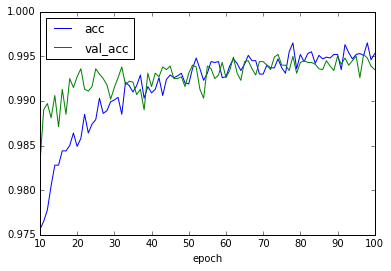

In [36]:
pool_dropout_data.loc[10:].plot(x='epoch', y=['acc', 'val_acc'])

### 4.2 Comparing accuracies and validation accuracies across networks

In [17]:
def combined_df(column_name, dict_of_dfs):
    combined_df = pd.DataFrame()
    for key, value in dict_of_dfs.items():
        combined_df[key] = value[column_name] 
    return combined_df

pool_dropout_combos = {
    'no_pool_no_dropout_data': no_pool_no_dropout_data,
    'pool_no_dropout_data': pool_no_dropout_data,
    'pool_dropout_data': pool_dropout_data,
    'dropout_no_pool_data': dropout_no_pool_data
}

In [38]:
# Construct combined dfs
acc_combined = combined_df('acc', pool_dropout_combos)
val_acc_combined = combined_df('val_acc', pool_dropout_combos)
print("Combined accuracy df, index is epochs")
acc_combined.head()

Combined accuracy df, index is epochs


,pool_no_dropout_data,pool_dropout_data,dropout_no_pool_data,no_pool_no_dropout_data
1,0.6277,0.5913,0.6792,0.7152
2,0.9086,0.8742,0.9167,0.9315
3,0.9498,0.9198,0.9504,0.9614
4,0.9635,0.9414,0.9622,0.9708
5,0.9731,0.9507,0.9718,0.9757


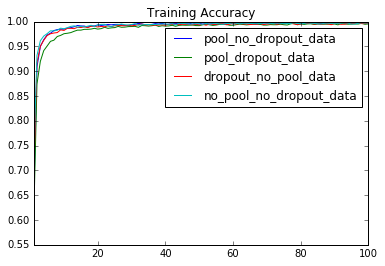

In [20]:
acc_combined.plot(title='Training Accuracy')

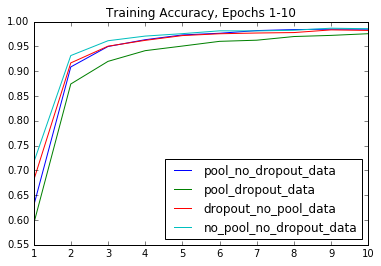

In [30]:
acc_combined.loc[:10].plot(title='Training Accuracy, Epochs 1-10')

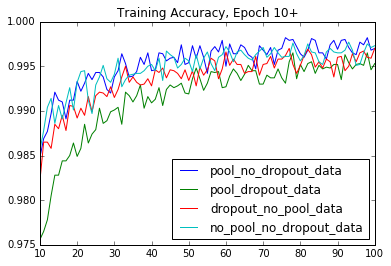

In [29]:
acc_combined.loc[10:].plot(title='Training Accuracy, Epoch 10+')

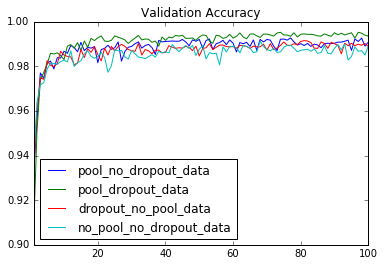

In [32]:
val_acc_combined.plot(title='Validation Accuracy')

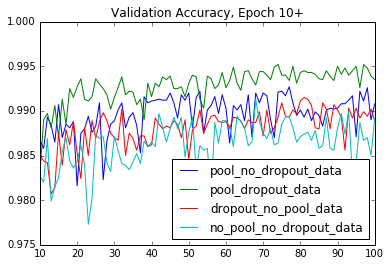

In [33]:
val_acc_combined.loc[10:].plot(title='Validation Accuracy, Epoch 10+')